In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
height, width = 512, 512
hu_filename = 'input/107-HU.in'
seg_filename = 'input/107-seg.in'
hu_data = np.loadtxt(hu_filename, usecols=range(width))
seg_data = np.loadtxt(seg_filename, usecols=range(width))
hu_data = np.array([hu_data[i][j] for i in range(height) for j in range(width)])
seg_data = np.array([seg_data[i][j] for i in range(height) for j in range(width)])
df = pd.DataFrame({'hounsfield':hu_data, 'label': seg_data})
df.head()

,hounsfield,label
0,-3024.0,0.0
1,-3024.0,0.0
2,-3024.0,0.0
3,-3024.0,0.0
4,-3024.0,0.0


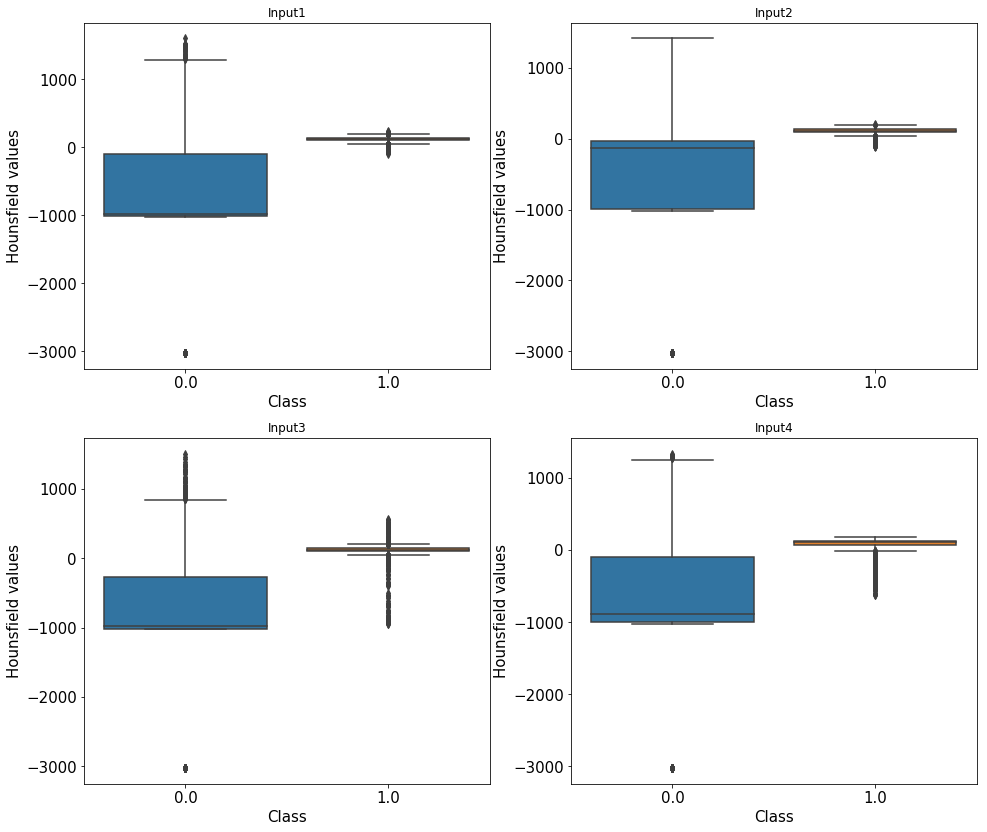

In [3]:
height, width = 512, 512
inputs = [('input/107-HU.in', 'input/107-seg.in'),('input2/89-HU.in', 'input2/89-seg.in'), 
          ('input3/121-HU.in', 'input3/121-seg.in'), ('input4/187-HU.in', 'input4/187-seg.in')]

plt.figure(figsize=(16, 14))
row, col = 2, 2
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i][0], usecols=range(width))
    seg_data = np.loadtxt(inputs[i][1], usecols=range(width))
    hu_data = np.array([hu_data[i][j] for i in range(height) for j in range(width)])
    seg_data = np.array([seg_data[i][j] for i in range(height) for j in range(width)])
    df = pd.DataFrame({'hounsfield':hu_data, 'label': seg_data})
    plt.subplot(row, col, i + 1)
    plt.title('Input' + str(i + 1))
    sns.boxplot(y=df['hounsfield'], x=df['label'])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Hounsfield values', fontsize=15)
    plt.xlabel('Class', fontsize=15)

plt.show()
    


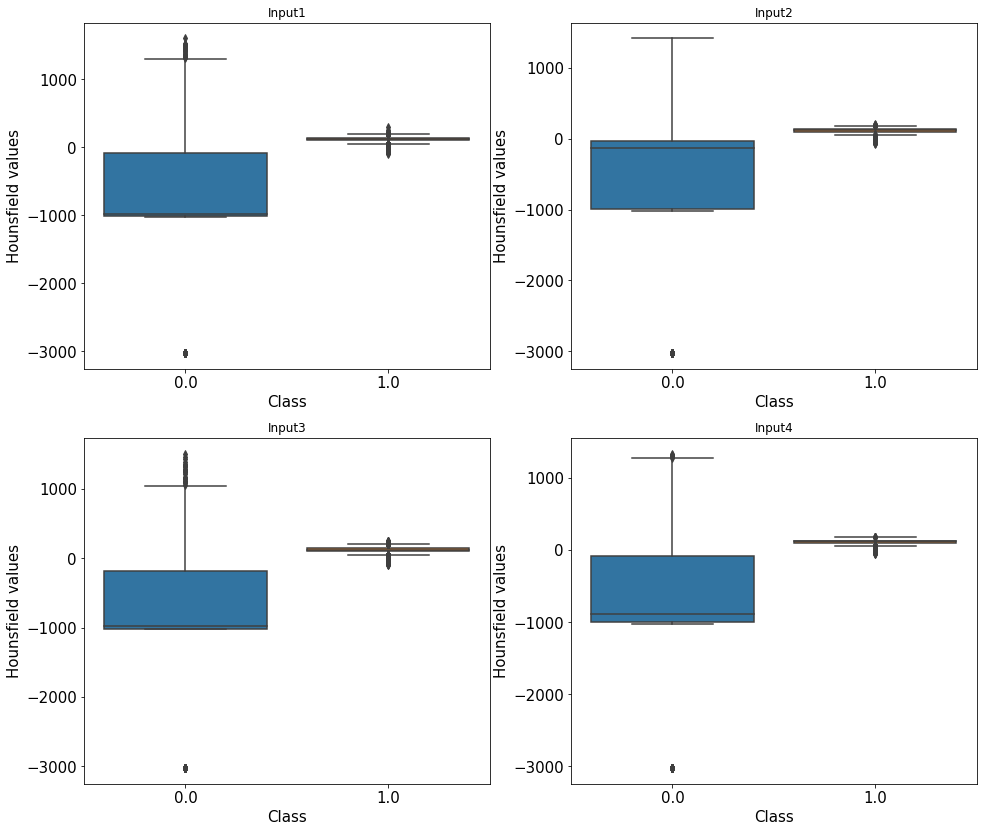

In [4]:
height, width = 512, 512
inputs = [('input/107-HU.in', 'input/107-opt.out'),('input2/89-HU.in', 'input2/89-opt.out'), 
          ('input3/121-HU.in', 'input3/121-opt.out'), ('input4/187-HU.in', 'input4/187-opt.out')]

plt.figure(figsize=(16, 14))
row, col = 2, 2
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i][0], usecols=range(width))
    seg_data = np.loadtxt(inputs[i][1], usecols=range(width))
    hu_data = np.array([hu_data[i][j] for i in range(height) for j in range(width)])
    seg_data = np.array([seg_data[i][j] for i in range(height) for j in range(width)])
    df = pd.DataFrame({'hounsfield':hu_data, 'label': seg_data})
    plt.subplot(row, col, i + 1)
    plt.title('Input' + str(i + 1))
    sns.boxplot(y=df['hounsfield'], x=df['label'])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Hounsfield values', fontsize=15)
    plt.xlabel('Class', fontsize=15)

plt.show()
   

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

Score for number of cluster(s) 2: -54401936322.04101
Score for number of cluster(s) 3: -1712220841.6611385
Score for number of cluster(s) 4: -1133368958.607177
Score for number of cluster(s) 5: -789213302.6360364
Score for number of cluster(s) 6: -554767606.5531877
Score for number of cluster(s) 7: -398938551.3889806
Score for number of cluster(s) 8: -314820871.9996348
Score for number of cluster(s) 9: -254928895.29573363
Score for number of cluster(s) 2: -42957041794.53618
Score for number of cluster(s) 3: -3032613080.118659
Score for number of cluster(s) 4: -1726152021.3863914
Score for number of cluster(s) 5: -1063927797.0239183
Score for number of cluster(s) 6: -743999248.6732415
Score for number of cluster(s) 7: -517384224.23332727
Score for number of cluster(s) 8: -424588555.6746373
Score for number of cluster(s) 9: -336835185.8018681
Score for number of cluster(s) 2: -55872940293.119644
Score for number of cluster(s) 3: -1766597378.6275694
Score for number of cluster(s) 4: -1163

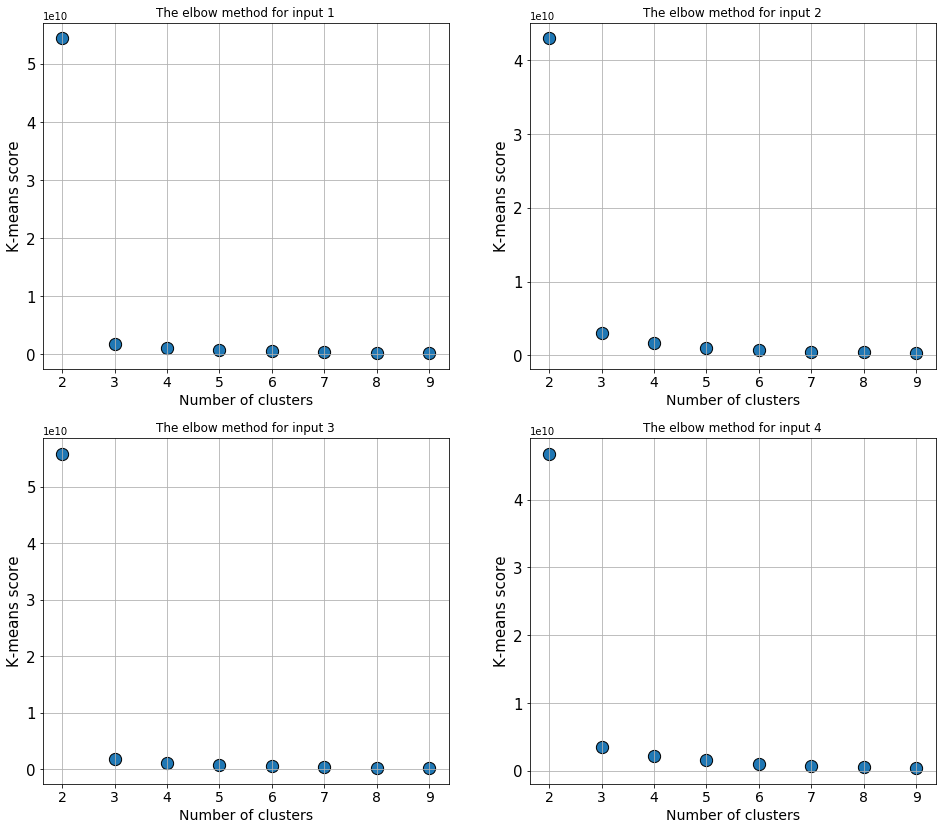

In [9]:
inputs = [('input/107-HU.in', 'input/107-seg.in'),('input2/89-HU.in', 'input2/89-seg.in'), 
          ('input3/121-HU.in', 'input3/121-seg.in'), ('input4/187-HU.in', 'input4/187-seg.in')]
height, width = 512, 512
rows, cols = 2, 2
plt.figure(figsize=(16, 14))
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i][0], usecols=range(width))
    seg_data = np.loadtxt(inputs[i][1], usecols=range(width))
    X = np.array([hu_data[i][j] for i in range(height) for j in range(width)])
#     y = np.array([seg_data[i][j] for i in range(height) for j in range(width)])
    X = X.reshape(-1, 1)
    km_scores = []
    km_silhouette_score = []
    for j in range(2, 10):
        km = KMeans(n_clusters=j, random_state=0).fit(X)
        preds = km.predict(X)
        print('Score for number of cluster(s) {}: {}'.format(j, km.score(X)))
        km_scores.append(-km.score(X))
    plt.subplot(rows, cols, i + 1)
    plt.title('The elbow method for input ' + str(i + 1))
    plt.scatter(x=[j for j in range(2, 10)], y=km_scores, s=150, edgecolor='k')
    plt.grid(True)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("K-means score",fontsize=15)
    plt.xticks([j for j in range(2,10)],fontsize=14)
    plt.yticks(fontsize=15)
    
plt.show()

In [12]:
height, width = 512, 512

inputs = ['input/107-HU.in', 'input2/89-HU.in', 
          'input3/121-HU.in', 'input4/187-HU.in']
K = 3
center1 = []
center2 = []
center3 = []
rows, cols = 2, 2
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i], usecols=range(width))
    X = np.array([hu_data[i][j] for i in range(height) for j in range(width)])
    X = X.reshape(-1, 1)
    km_model = KMeans(n_clusters=K).fit(X)
    centers = np.array(km_model.cluster_centers_)
    center1.append(centers[0])
    center2.append(centers[1])
    center3.append(centers[2])
                         
df = pd.DataFrame({'input': inputs, 'center1': center1, 'center2': center2, 'center3': center3})
print(df)
plt.show()

              input                center1    center2               center3
0   input/107-HU.in    [59.50745402659527]  [-3024.0]  [-968.1459305615931]
1   input2/89-HU.in  [-3.2303905081544144]  [-3024.0]  [-943.9163302366766]
2  input3/121-HU.in   [-965.9014634471941]  [-3024.0]   [71.79413532444119]
3  input4/187-HU.in   [27.847061427007475]  [-3024.0]  [-901.4627595134175]


In [15]:
height, width = 512, 512

inputs = [('input/107-HU.in', 'input/107-seg.in'),('input2/89-HU.in', 'input2/89-seg.in'), 
          ('input3/121-HU.in', 'input3/121-seg.in'), ('input4/187-HU.in', 'input4/187-seg.in')]
center0 = []
center1 = []
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i][0], usecols=range(width))
    seg_data = np.loadtxt(inputs[i][1], usecols=range(width))
    hu_data_lbl0 = []
    hu_data_lbl1 = []
    for i in range(height):
        for j in range(width):
            if seg_data[i][j] == 0:
                hu_data_lbl0.append(hu_data[i][j])
            else:
                hu_data_lbl1.append(hu_data[i][j])
    hu_data_lbl0 = np.array(hu_data_lbl0)
    hu_data_lbl1 = np.array(hu_data_lbl1)
    center0.append(hu_data_lbl0.mean())
    center1.append(hu_data_lbl1.mean())
                         
df = pd.DataFrame({'input': inputs, 'center0': center0, 'center1': center1})
print(df)

                                   input      center0     center1
0    (input/107-HU.in, input/107-seg.in) -1169.223870  121.765644
1    (input2/89-HU.in, input2/89-seg.in)  -896.220856  108.526154
2  (input3/121-HU.in, input3/121-seg.in) -1192.333208  118.492120
3  (input4/187-HU.in, input4/187-seg.in) -1084.332986   86.764124


In [20]:
height, width = 512, 512

inputs = [('input/107-HU.in', 'input/107-opt.out'),('input2/89-HU.in', 'input2/89-opt.out'), 
          ('input3/121-HU.in', 'input3/121-opt.out'), ('input4/187-HU.in', 'input4/187-opt.out')]
center0 = []
center1 = []
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i][0], usecols=range(width))
    opt_data = np.loadtxt(inputs[i][1], usecols=range(width))
    hu_data_lbl0 = []
    hu_data_lbl1 = []
    for i in range(height):
        for j in range(width):
            if hu_data[i][j] != -3024.0:
                if opt_data[i][j] == 0:
                    hu_data_lbl0.append(hu_data[i][j])
                else:
                    hu_data_lbl1.append(hu_data[i][j])
    hu_data_lbl0 = np.array(hu_data_lbl0)
    hu_data_lbl1 = np.array(hu_data_lbl1)
    center0.append(hu_data_lbl0.mean())
    center1.append(hu_data_lbl1.mean())
                         
df = pd.DataFrame({'input': inputs, 'center0': center0, 'center1': center1})
print(df)

                                    input     center0     center1
0    (input/107-HU.in, input/107-opt.out) -613.657118  123.446920
1    (input2/89-HU.in, input2/89-opt.out) -312.576236  115.380987
2  (input3/121-HU.in, input3/121-opt.out) -620.250641  120.550781
3  (input4/187-HU.in, input4/187-opt.out) -532.122639  112.013001


In [19]:
height, width = 512, 512


K = 2
center1 = []
center0 = []
for i in range(len(inputs)):
    hu_data = np.loadtxt(inputs[i], usecols=range(width))
    X = np.array([hu_data[i][j] for i in range(height) for j in range(width) if hu_data[i][j] != -3024.0] )
    X = X.reshape(-1, 1)
    km_model = KMeans(n_clusters=K).fit(X)
    centers = np.array(km_model.cluster_centers_)
    center0.append(centers[0])
    center1.append(centers[1])
                         
df = pd.DataFrame({'input': inputs, 'center0': center0, 'center1': center1})
print(df)

              input                center0               center1
0   input/107-HU.in   [59.507454027628114]  [-968.1459305606513]
1   input2/89-HU.in  [-3.2303905082786173]  [-943.9163302367269]
2  input3/121-HU.in    [-965.901463446784]   [71.79413532492936]
3  input4/187-HU.in   [27.847061427671406]  [-901.4627595128873]


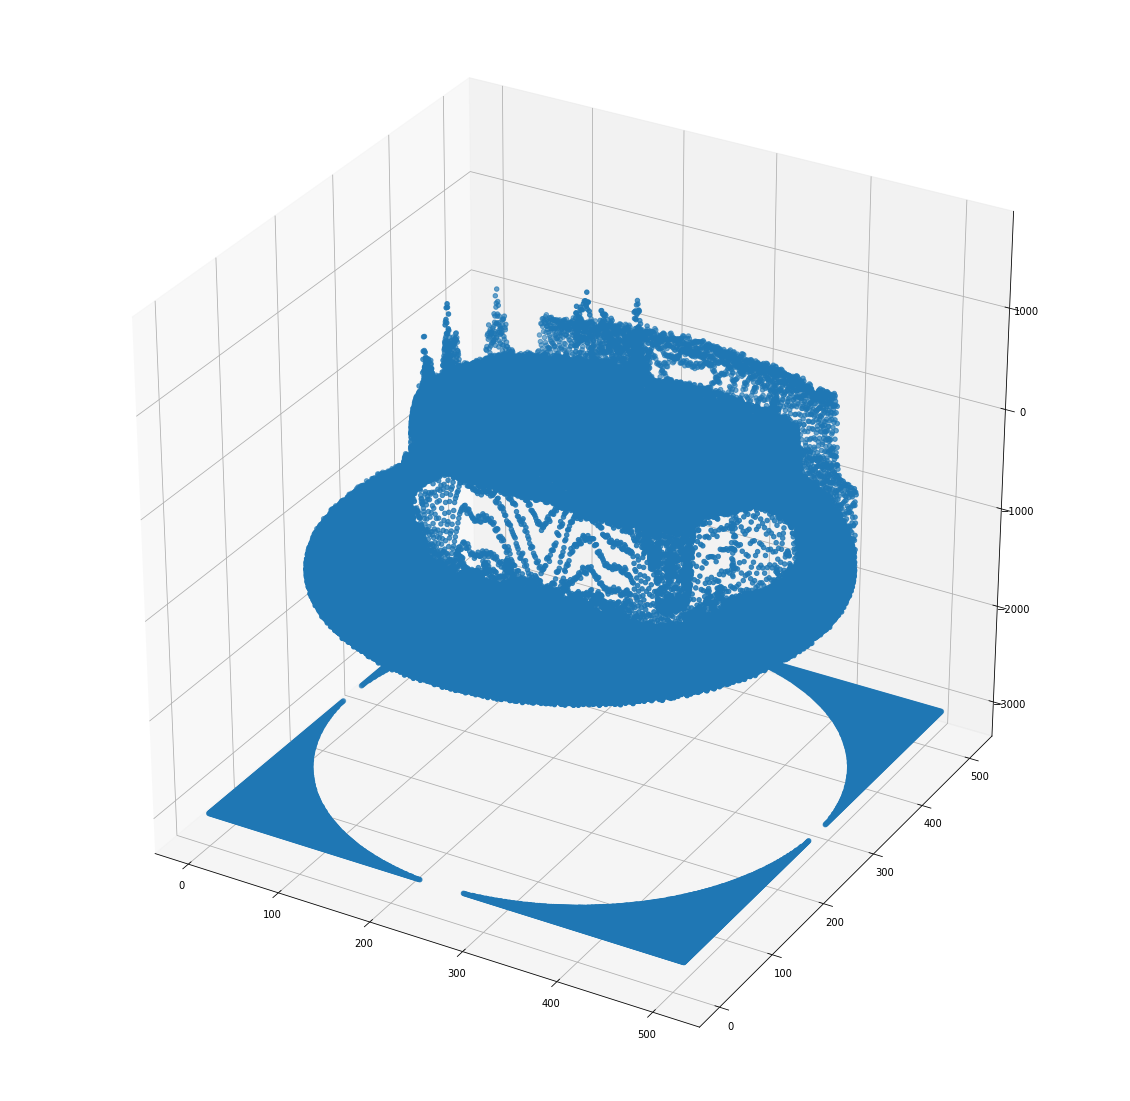

In [3]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

csv_data = ['input/107-HU.csv', 'input2/89-HU.csv', 'input3/121-HU.csv', 'input4/187-HU.csv']
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[0], delimiter=',')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_position'], df['y_position'], df['hu_val'])
plt.show()

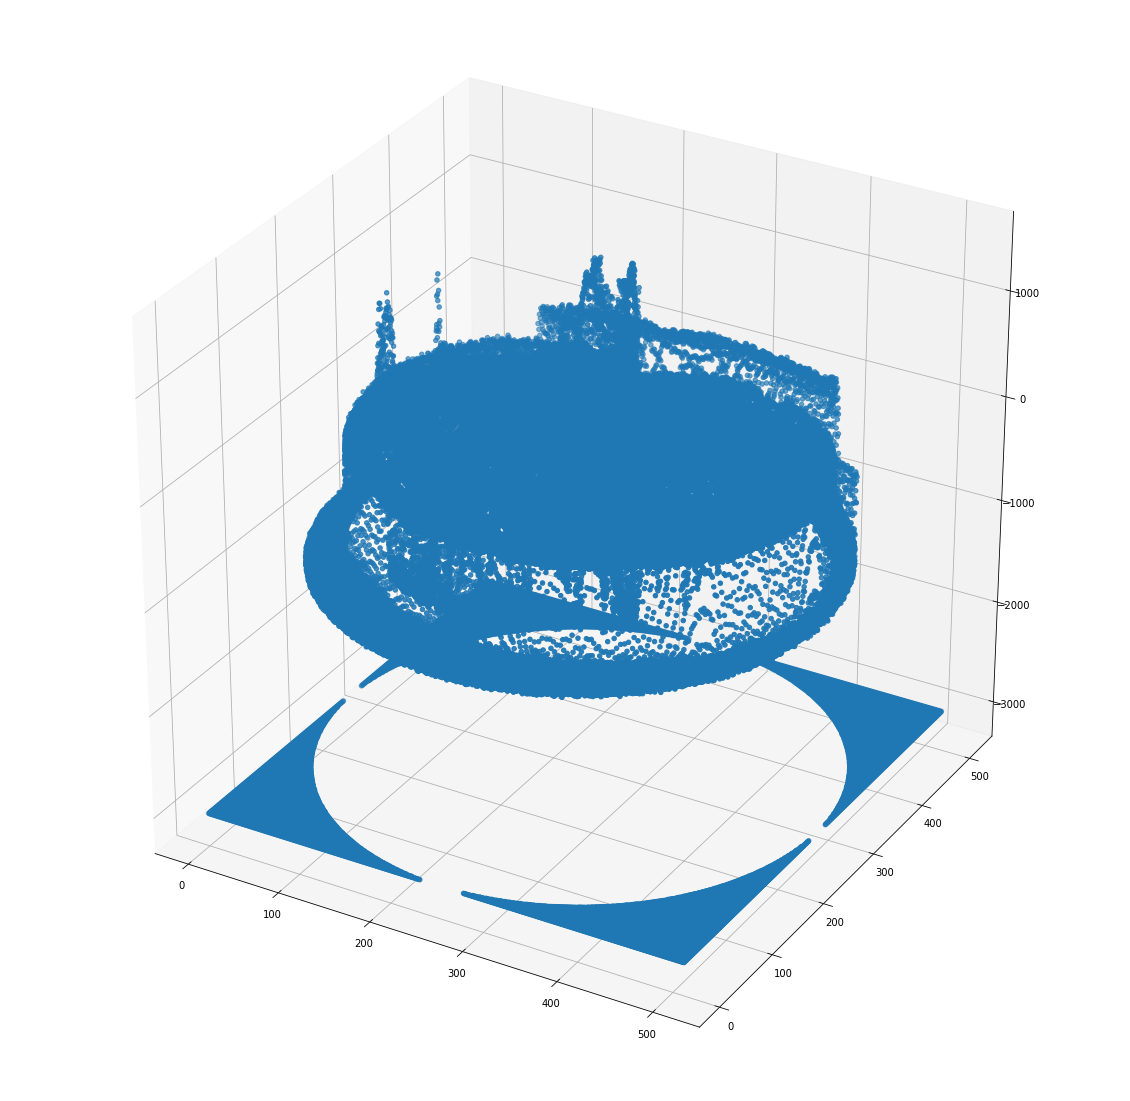

In [4]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[1], delimiter=',')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_position'], df['y_position'], df['hu_val'])
plt.show()

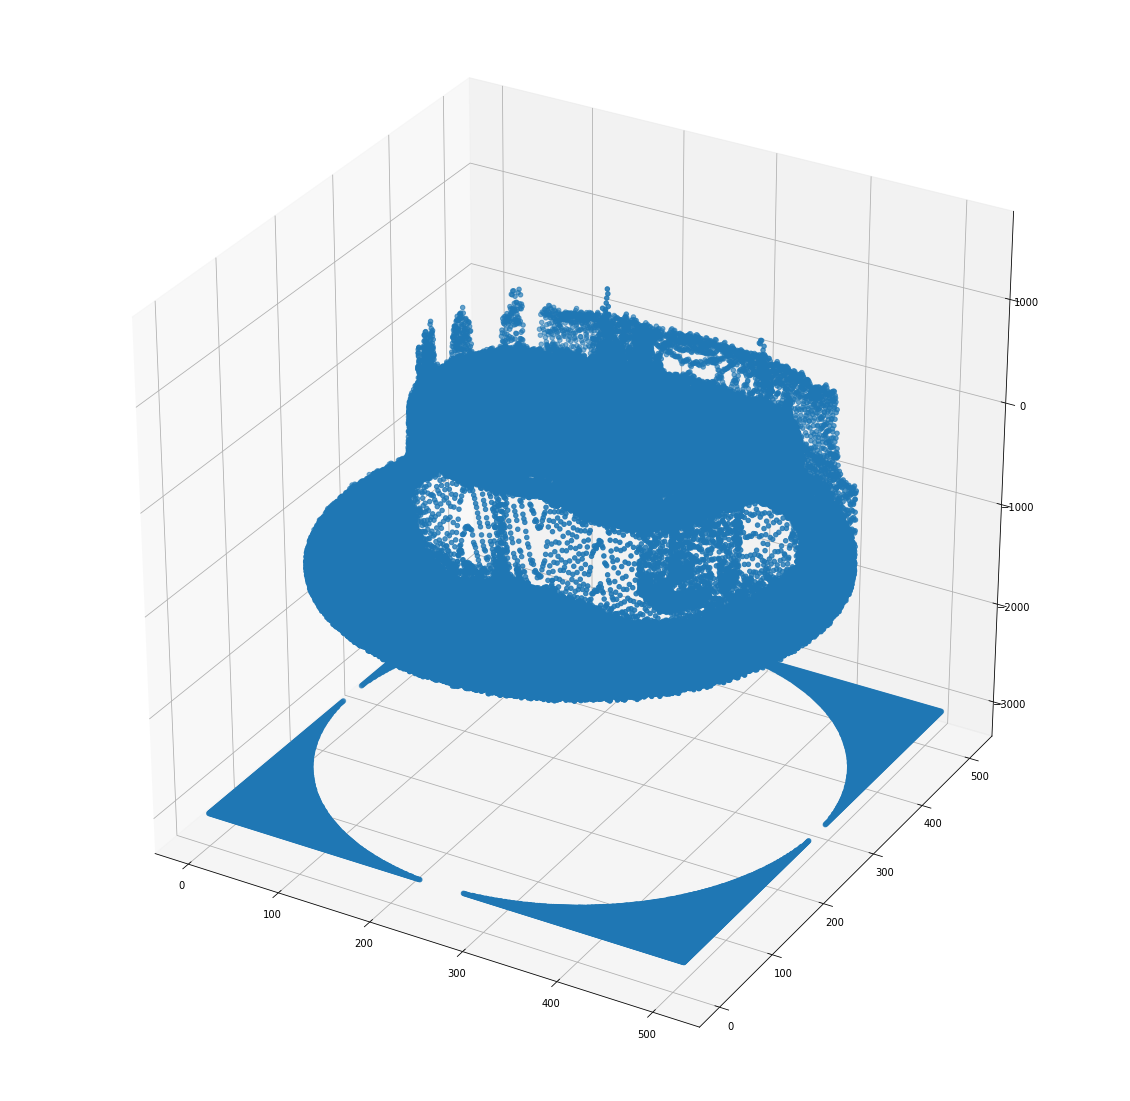

In [5]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[2], delimiter=',')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_position'], df['y_position'], df['hu_val'])
plt.show()

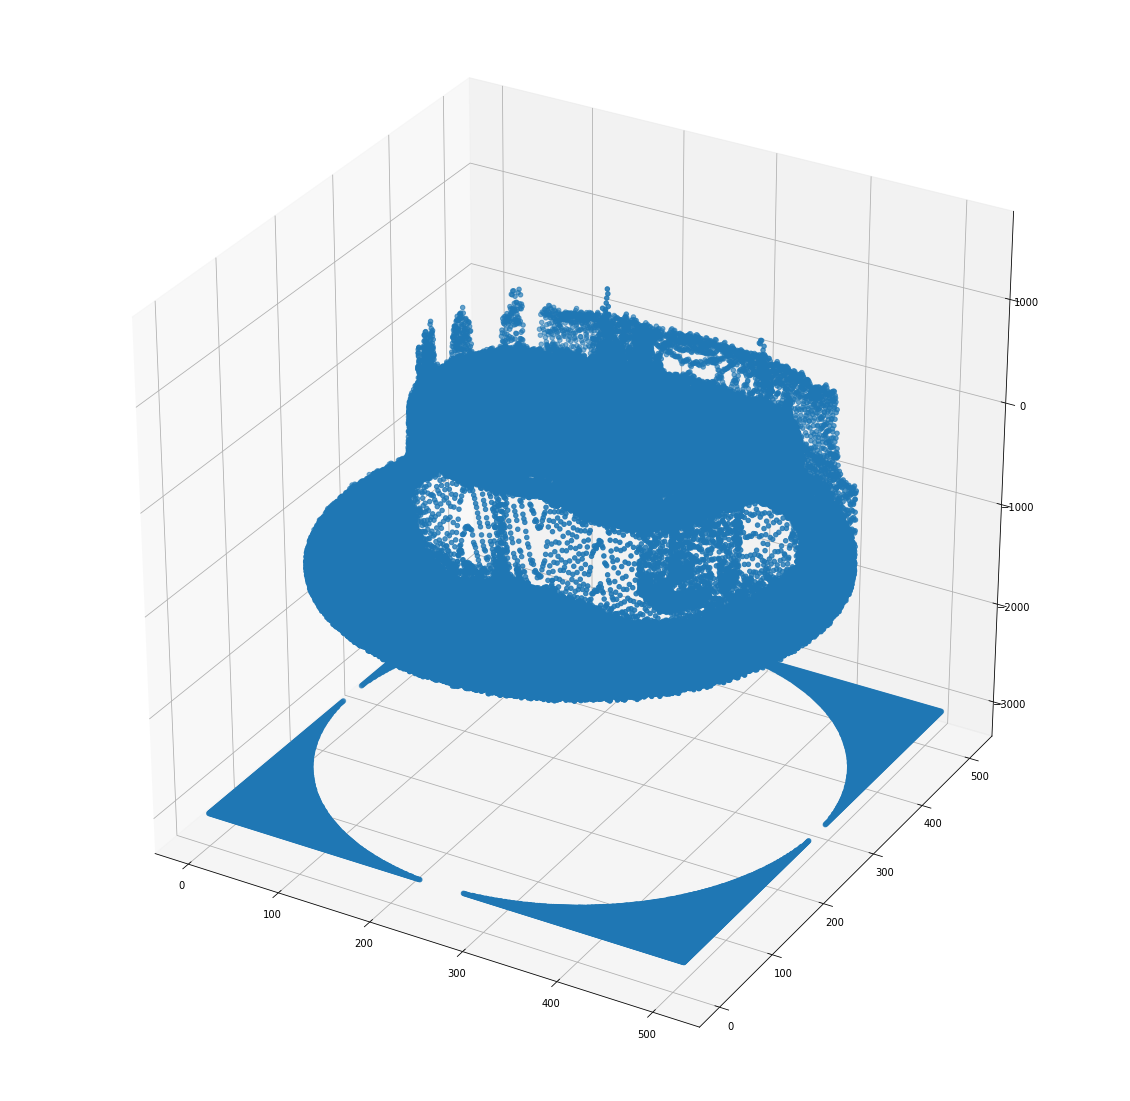

In [6]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[2], delimiter=',')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_position'], df['y_position'], df['hu_val'])
plt.show()

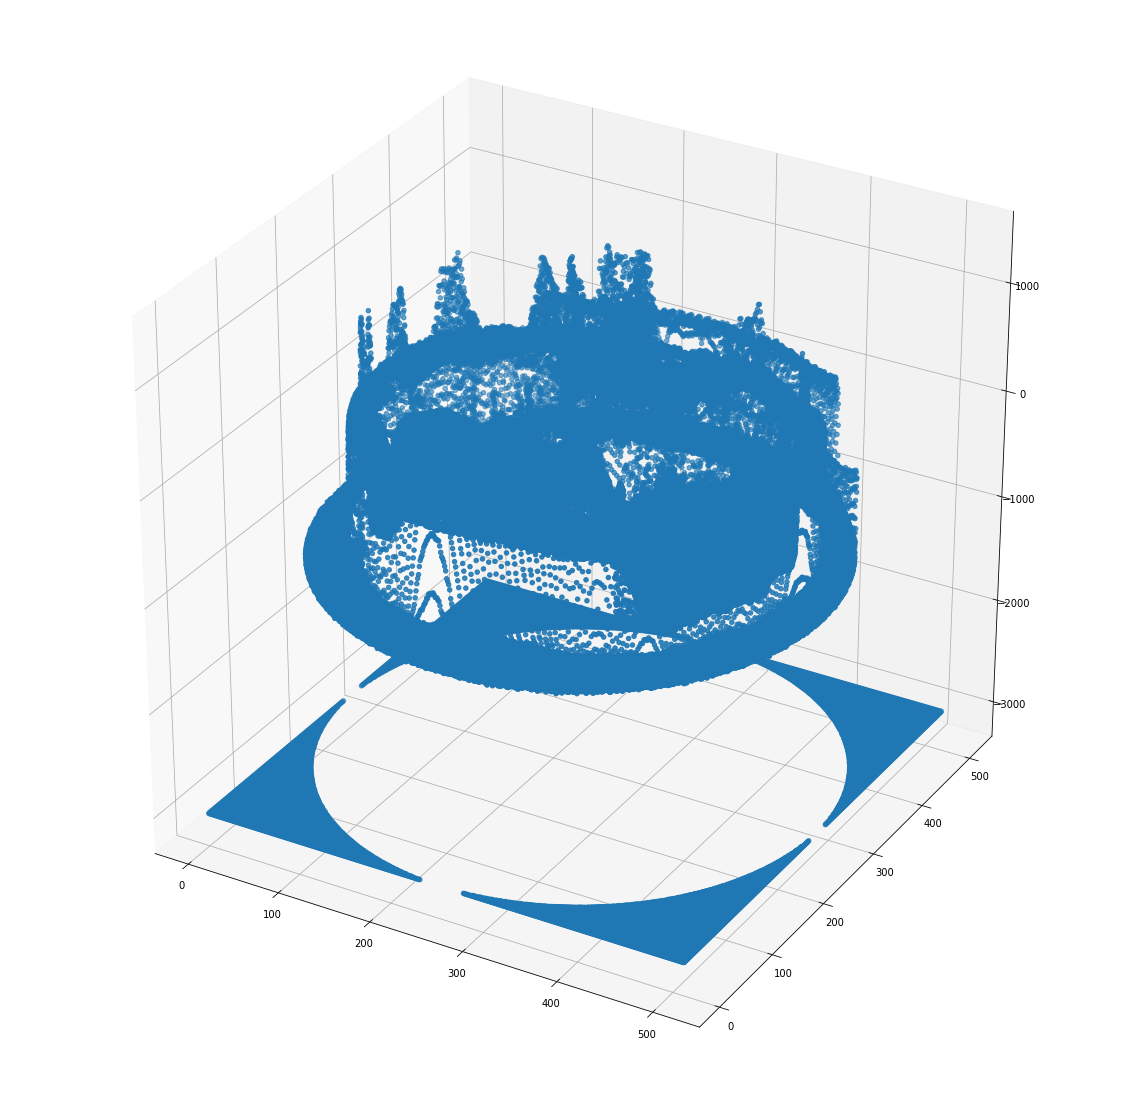

In [7]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[3], delimiter=',')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_position'], df['y_position'], df['hu_val'])
plt.show()

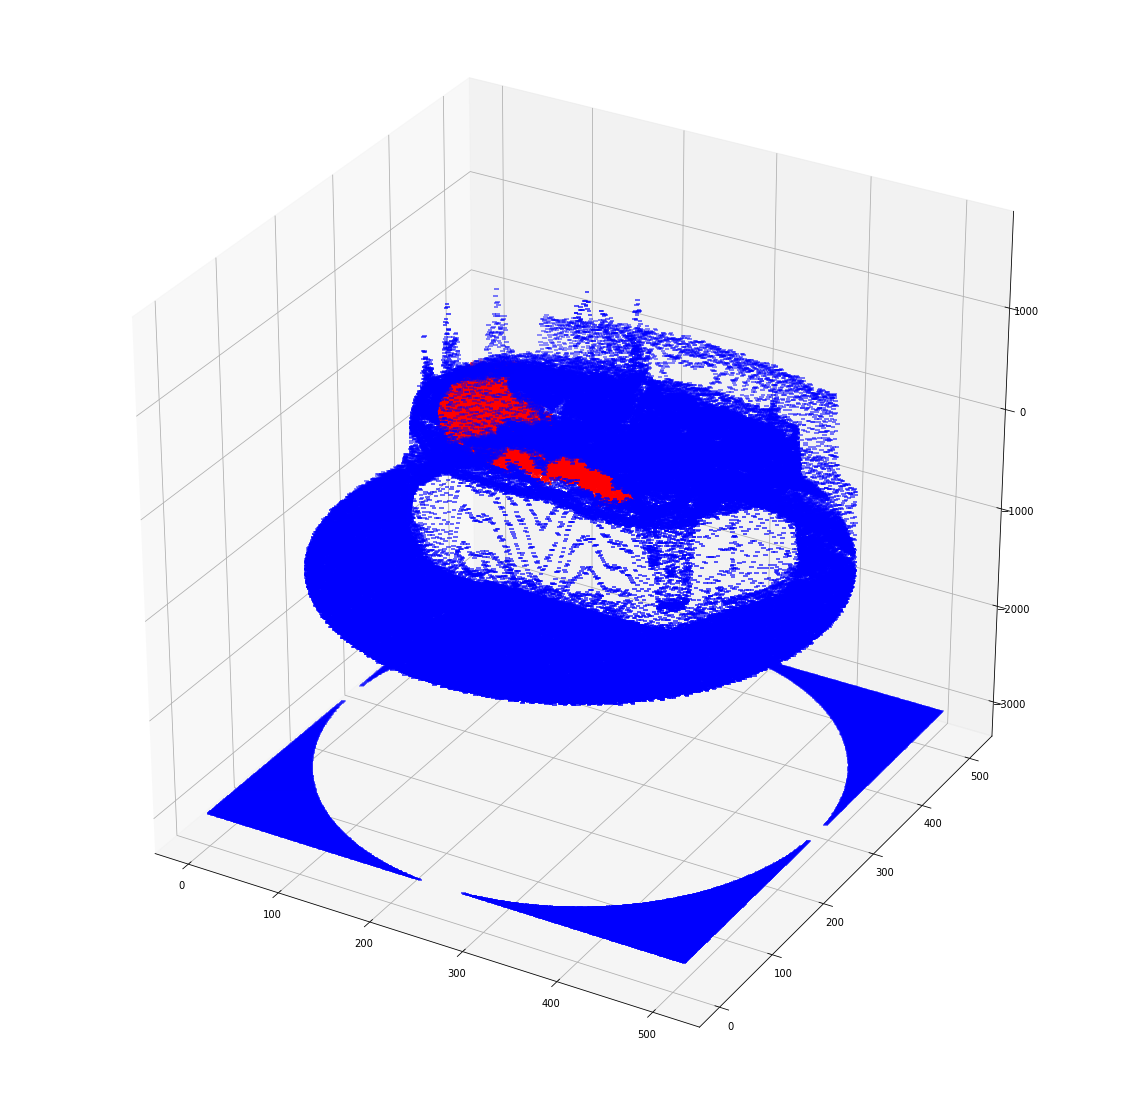

In [13]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[0], delimiter=',')
ax = fig.add_subplot(111, projection='3d')

pixels_0 = df.loc[df['seg_val'] == 0]
pixels_1 = df.loc[df['seg_val'] == 1]

ax.scatter(pixels_0['x_position'], pixels_0['y_position'], pixels_0['hu_val'], marker='_', color='blue')
ax.scatter(pixels_1['x_position'], pixels_1['y_position'], pixels_1['hu_val'], marker='+', color='red')

plt.show()

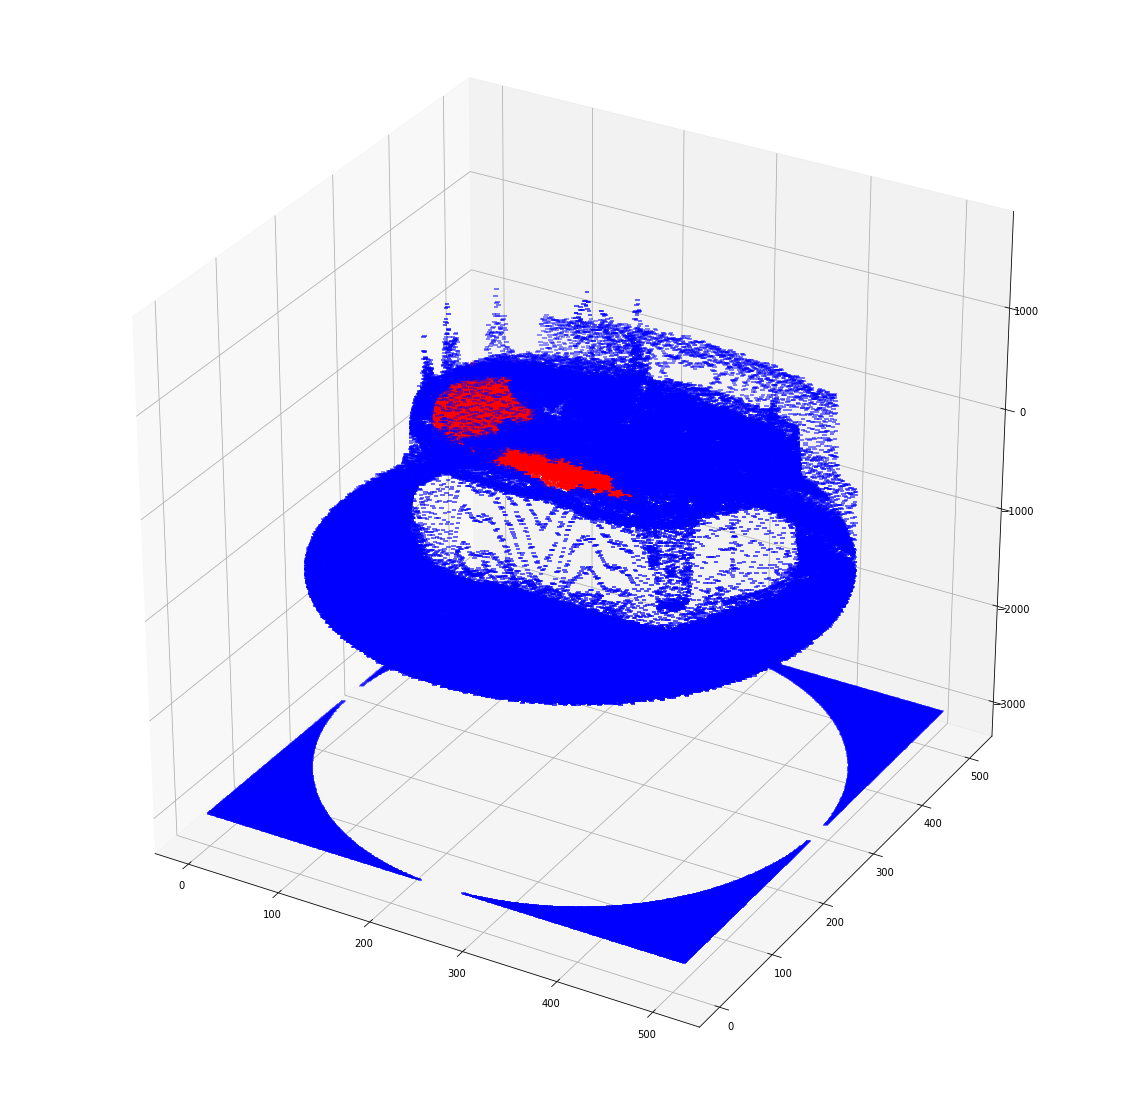

In [15]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

df = pd.read_csv(csv_data[0], delimiter=',')
ax = fig.add_subplot(111, projection='3d')

pixels_0 = df.loc[df['opt_val'] == 0]
pixels_1 = df.loc[df['opt_val'] == 1]

ax.scatter(pixels_0['x_position'], pixels_0['y_position'], pixels_0['hu_val'], marker='_', color='blue')
ax.scatter(pixels_1['x_position'], pixels_1['y_position'], pixels_1['hu_val'], marker='+', color='red')

plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC